In [1]:
"""
FEniCS tutorial demo program: Incompressible Navier-Stokes equations
for flow around a cylinder using the Incremental Pressure Correction
Scheme (IPCS).

  u' + u . nabla(u)) - div(sigma(u, p)) = f
                                 div(u) = 0
"""

from __future__ import print_function
from fenics import *
from mshr import *
import numpy as np

%matplotlib inline

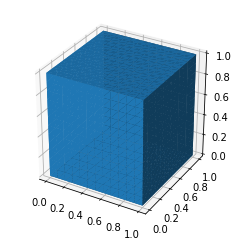

In [2]:
# Create mesh

nx = 12
ny = 12
nz = 12

mesh = UnitCubeMesh(nx,ny,nz) # 10 is number of intervals Omega is divided into
plot(mesh);

In [3]:
xdmffile_p1 = XDMFFile(mesh.mpi_comm(), 'two_comp_results/p1.xdmf')
xdmffile_p2 = XDMFFile(mesh.mpi_comm(), 'two_comp_results/p2.xdmf')


xml_mesh = File('two_comp_results/mesh.xml')
xml_mesh << mesh

In [4]:
# Define function spaces. Define trial and test functions

el = tetrahedron

P = FiniteElement('P',el,2)


element = MixedElement([P,P])
FS = FunctionSpace(mesh,element)


# Define test functions
q1,q2 = TestFunctions(FS)


Calling FFC just-in-time (JIT) compiler, this may take some time.


In [5]:

# Define boundaries
inflow   = 'near(x[0], 0)'
outflow  = 'near(x[2], 1)'


# Define inflow profile
inflow_profile = ('2*pi*sin(2*pi*x[1])')

bcp_inflow1 = DirichletBC(FS.sub(0), Expression(inflow_profile, degree=2), inflow)
bcp_outflow2 = DirichletBC(FS.sub(1), Constant(0), outflow)
bcs = [bcp_inflow1,bcp_outflow2]


K1 = Constant(0.5)
K2 = Constant(0.3)

f = Constant(0)
s = Constant(0)

beta12 = Constant(0.12)

p = Function(FS)
p1, p2 = split(p)



F = -K1 * dot(grad(p1), grad(q1))*dx + -K2 * dot(grad(p2), grad(q2))*dx \
    + dot(beta12*(p1-p2),q1)*dx + dot(beta12*(p2-p1),q2)*dx
    


In [6]:
solve(F==0, p, bcs)


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [7]:
p1,p2 = p.split()

xdmffile_p1.write_checkpoint(p1, 'p1')
xdmffile_p2.write_checkpoint(p2, 'p2')


xdmffile_p1.close()
xdmffile_p2.close()

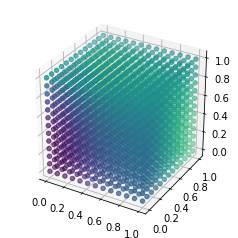

In [9]:
plot(p2)